In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_classif
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import xgboost as xgb
import lightgbm as lgb
import joblib
from datetime import datetime


In [69]:
df=pd.read_csv(r'D:\Coding\MLdata\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [70]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['tenure'] * df['MonthlyCharges'])
# encode target
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})
df=df.drop('customerID',axis=1)

In [38]:
# encode categoricals
df_encoded = df.copy()
cat_cols = df.select_dtypes(include='object')
for col in cat_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

In [39]:
X = df_encoded.drop('Churn', axis=1)
Y = df_encoded['Churn']

In [40]:
impute = SimpleImputer()
impute.fit(X[['TotalCharges']])
X['TotalCharges'] = impute.transform(X[['TotalCharges']])
X = X.dropna()
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [41]:
X.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000


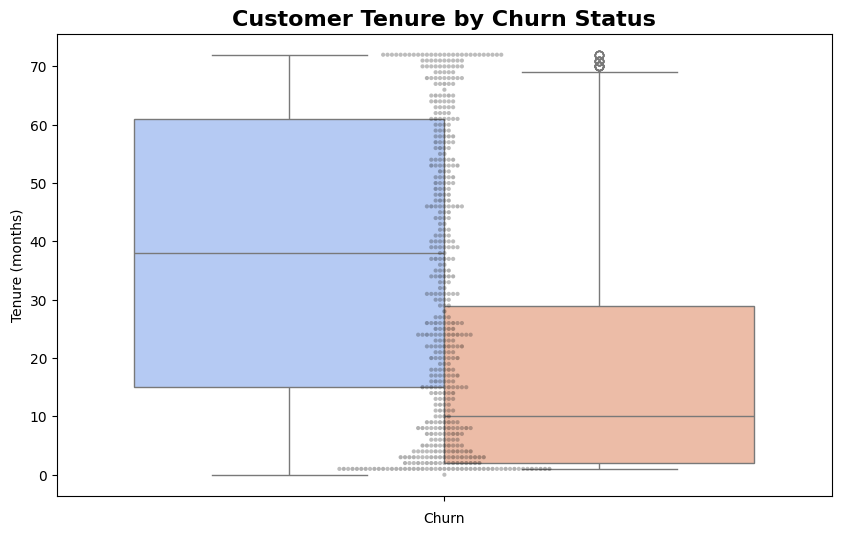

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, hue='Churn', y='tenure', palette='coolwarm',legend=False)
sns.swarmplot(data=df.sample(500),hue='Churn', y='tenure', palette='dark:black',legend=False, alpha=0.3, size=3)
plt.title('Customer Tenure by Churn Status', fontsize=16, fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')
plt.show()

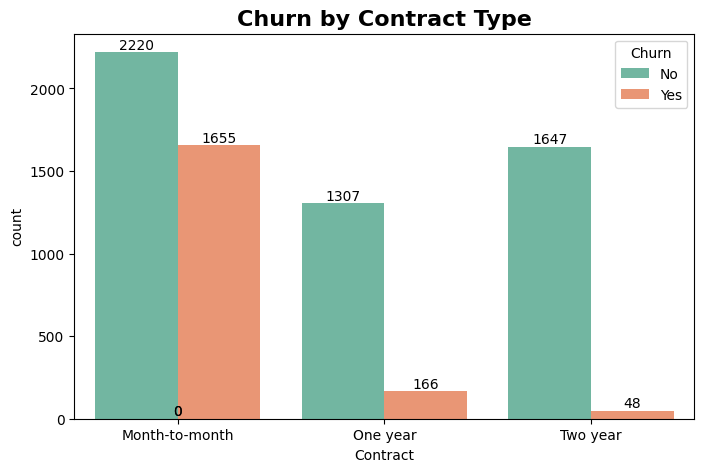

In [43]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='Contract', hue='Churn', palette='Set2')
plt.title('Churn by Contract Type', fontsize=16, fontweight='bold')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

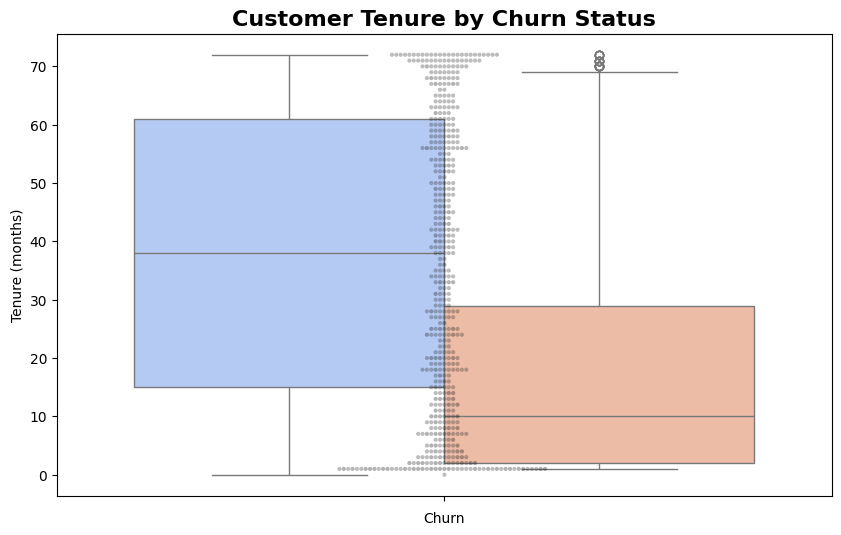

In [44]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, hue='Churn', y='tenure', palette='coolwarm',legend=False)
sns.swarmplot(data=df.sample(500), hue='Churn', y='tenure', palette='dark:black',legend=False, alpha=0.3, size=3)
plt.title('Customer Tenure by Churn Status', fontsize=16, fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')
plt.show()

C:\Users\khezr\AppData\Local\Temp\ipykernel_33832\2726444351.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.values, y=feat_imp.index, palette='rocket')


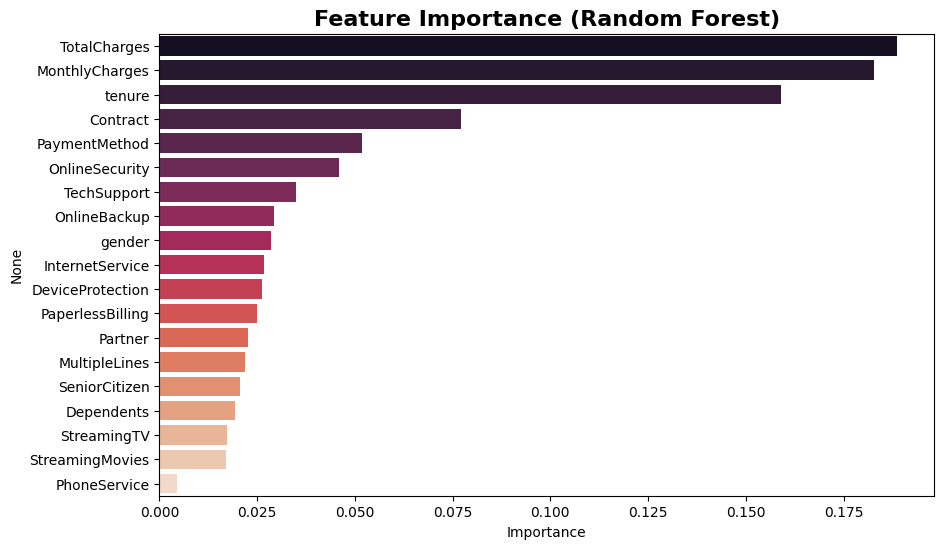

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=12)
model.fit(X, Y)
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette='rocket')
plt.title('Feature Importance (Random Forest)', fontsize=16, fontweight='bold')
plt.xlabel('Importance')
plt.show()

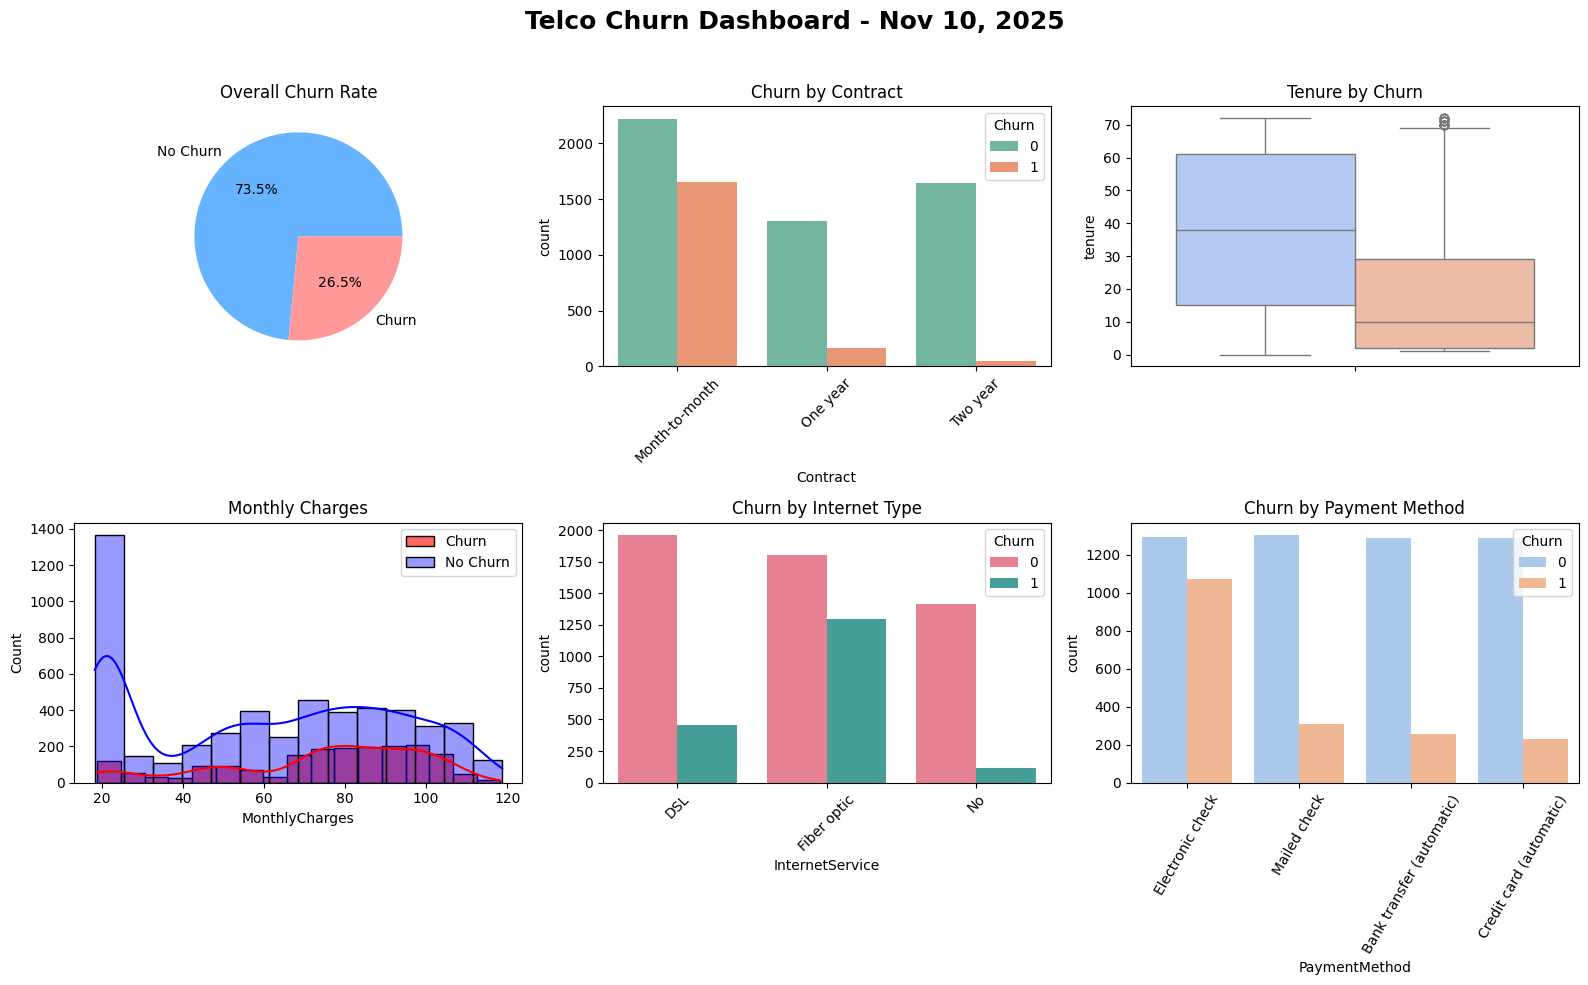

In [71]:
plt.figure(figsize=(16,10))

plt.subplot(2, 3, 1)
plt.pie(df['Churn'].value_counts(), labels=['No Churn', 'Churn'], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Overall Churn Rate')

plt.subplot(2, 3, 2)
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set2')
plt.title('Churn by Contract')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
sns.boxplot(data=df, hue='Churn', y='tenure', palette='coolwarm',legend=False)
plt.title('Tenure by Churn')

plt.subplot(2, 3, 4)
sns.histplot(data=df[df['Churn']==1], x='MonthlyCharges', color='red', alpha=0.6, label='Churn', kde=True)
sns.histplot(data=df[df['Churn']==0], x='MonthlyCharges', color='blue', alpha=0.4, label='No Churn', kde=True)
plt.title('Monthly Charges')
plt.legend()

plt.subplot(2, 3, 5)
sns.countplot(data=df, x='InternetService', hue='Churn', palette='husl')
plt.title('Churn by Internet Type')
plt.xticks(rotation=45)

plt.subplot(2, 3, 6)
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='pastel')
plt.title('Churn by Payment Method')
plt.xticks(rotation=60)

plt.suptitle('Telco Churn Dashboard - Nov 10, 2025', fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [47]:
X=X.drop(['PhoneService','StreamingTV','StreamingMovies'],axis=1)

In [48]:
X_train , X_test ,Y_train , Y_test=train_test_split(X,Y)

In [49]:
scale_pos_weight = (Y_train == 0).sum() / (Y_train == 1).sum()

model1=xgb.XGBClassifier(objective='binary:logistic',
    eval_metric='auc',
    random_state=12,
    scale_pos_weight=scale_pos_weight,
    verbosity=0
    )

model2=lgb.LGBMClassifier(
    objective='binary',
    metric='auc',
    boosting_type='gbdt',
    class_weight='balanced',
    random_state=12,
)

model3=LogisticRegressionCV(
    Cs=20, cv=5, scoring='roc_auc',
    penalty='l2', solver='newton-cholesky',
    max_iter=10_000, n_jobs=-1, random_state=12
)

In [50]:
param_grid1 = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
grid = GridSearchCV(model1, param_grid1, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.8, 1.0], 'learning_rate': [0.01, 0.1], 'max_depth': [4, 6, ...], 'n_estimators': [200, 300], ...}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


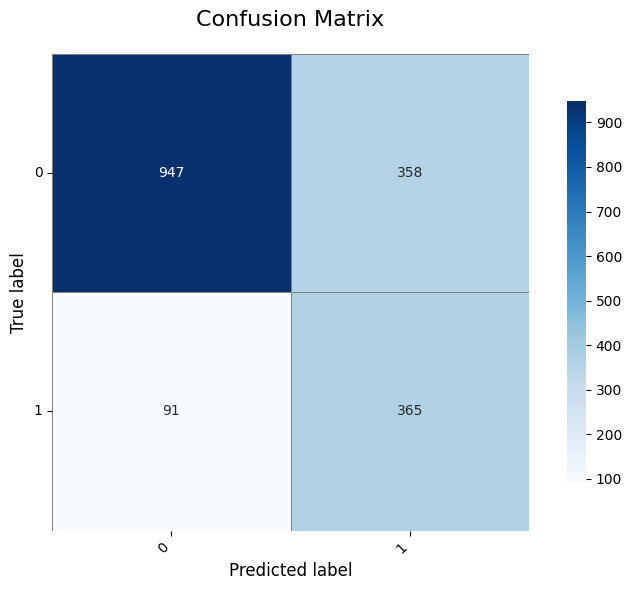

In [51]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,              
    fmt="d",                  
    cmap="Blues",
    linewidths=0.5,
    linecolor="gray",
    cbar_kws={"shrink": 0.8},
    square=True
)
plt.title("Confusion Matrix", fontsize=16, pad=20)
plt.xlabel("Predicted label", fontsize=12)
plt.ylabel("True label", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [52]:
param_grid2 = {
    'num_leaves': [31, 127],
    'max_depth': [6, 10],
    'learning_rate': [0.01, 0.05],
    'n_estimators': [200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
grid2 = GridSearchCV(model2, param_grid2, cv=5, scoring='roc_auc',n_jobs=-1, verbose=1)
grid2.fit(X_train, Y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[LightGBM] [Info] Number of positive: 1413, number of negative: 3869
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 618
[LightGBM] [Info] Number of data points in the train set: 5282, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


,estimator,LGBMClassifie...ndom_state=12)
,param_grid,"{'colsample_bytree': [0.8, 1.0], 'learning_rate': [0.01, 0.05], 'max_depth': [6, 10], 'n_estimators': [200, 300], ...}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,boosting_type,'gbdt'


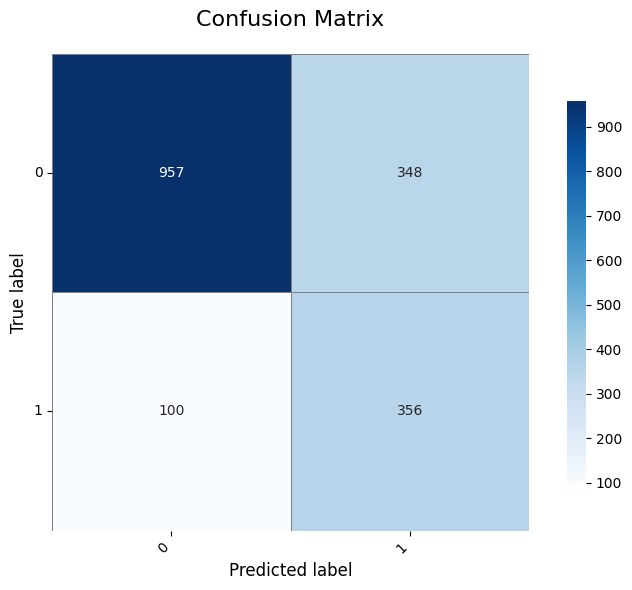

In [53]:
best_model2=grid2.best_estimator_
y_pred2=best_model2.predict(X_test)
cm2 = confusion_matrix(Y_test, y_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm2,
    annot=True,               
    fmt="d",                  
    cmap="Blues",
    linewidths=0.5,
    linecolor="gray",
    cbar_kws={"shrink": 0.8},
    square=True
)
plt.title("Confusion Matrix", fontsize=16, pad=20)
plt.xlabel("Predicted label", fontsize=12)
plt.ylabel("True label", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

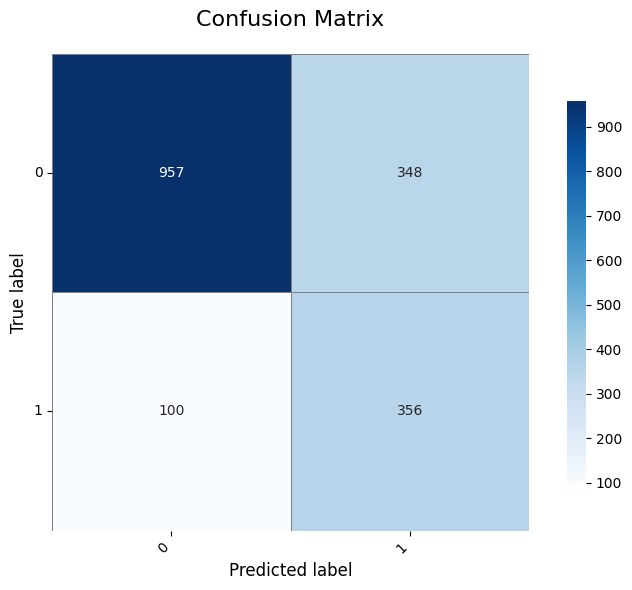

In [54]:
model3.fit(X_train,Y_train)
y_pred3=model3.predict(X_test)
cm3 = confusion_matrix(Y_test, y_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm3,
    annot=True,           
    fmt="d",                
    cmap="Blues",
    linewidths=0.5,
    linecolor="gray",
    cbar_kws={"shrink": 0.8},
    square=True
)
plt.title("Confusion Matrix", fontsize=16, pad=20)
plt.xlabel("Predicted label", fontsize=12)
plt.ylabel("True label", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [55]:
score=accuracy_score(Y_test,y_pred)
score

0.7450312322544009

In [56]:
score2=accuracy_score(Y_test,y_pred2)
score2

0.7455990914253265

In [57]:
score3=accuracy_score(Y_test,y_pred3)
score3

0.7995457126632595

In [58]:
FSCORE1=f1_score(Y_test,y_pred)
FSCORE1

0.6191687871077184

In [59]:
FSCORE2=f1_score(Y_test,y_pred2)
FSCORE2

0.6137931034482759

In [60]:
FSCORE3=f1_score(Y_test,y_pred3)
FSCORE3

0.5802615933412604

In [61]:
RSCORE1=recall_score(Y_test,y_pred)
RSCORE1

0.8004385964912281

In [62]:
RSCORE2=recall_score(Y_test,y_pred2)
RSCORE2

0.7807017543859649

In [63]:
RSCORE3=recall_score(Y_test,y_pred3)
RSCORE3

0.5350877192982456

In [ ]:
# save best model
model_path = f'xgb_churn_model_{datetime.now().strftime("%Y%m%d_%H%M")}.pkl'
joblib.dump(model1, model_path)
print(f"model path: {model_path}")

# save predictions
preds = pd.DataFrame({
    'y_true': Y_test.values,
    'y_pred': y_pred,
})
preds.to_csv('xgb_predictions.csv', index=False)

model path: xgb_churn_model_20251111_1130.pkl
